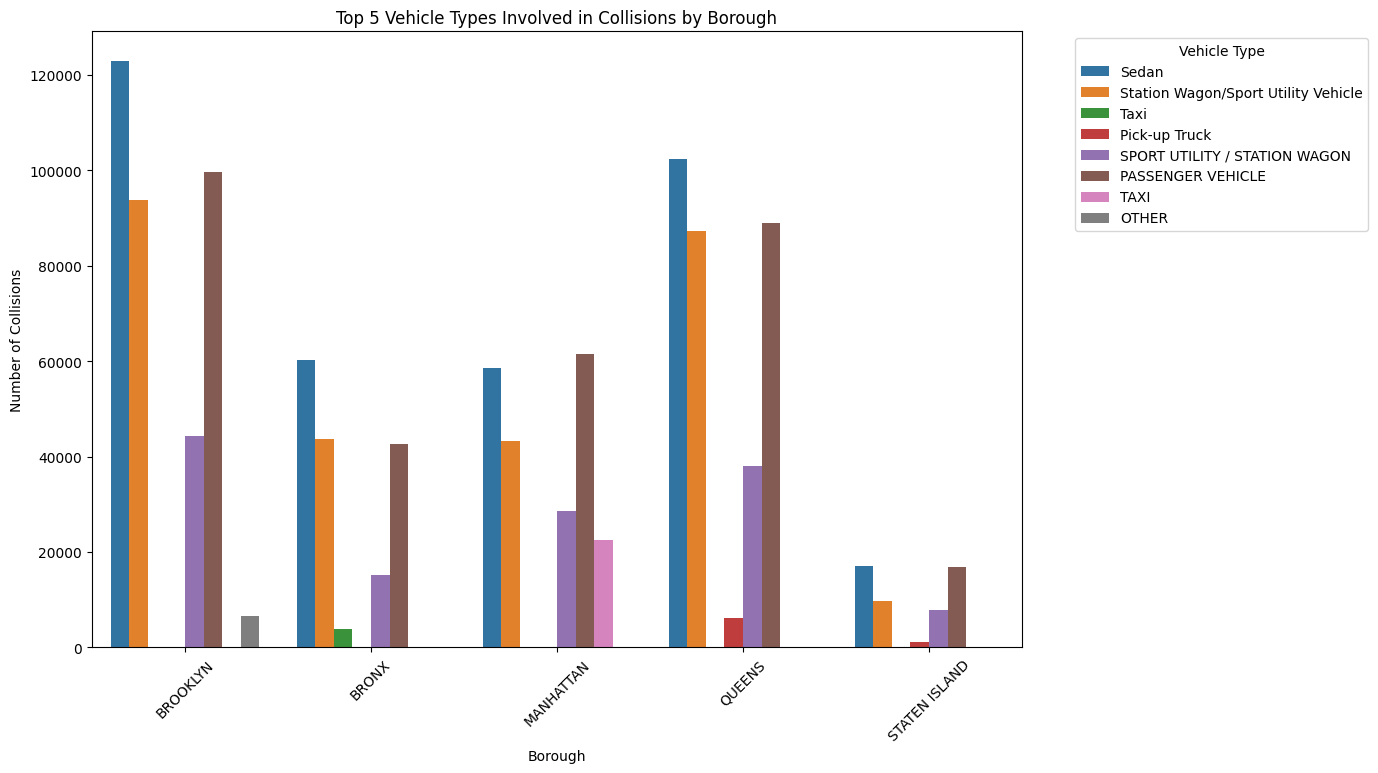

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('F:/Works/Data Visualisation/Datasets/motor_collision_cleaned.csv', low_memory=False)

N = 5  # Change N to the desired number of top vehicle types
top_vehicle_types = df.groupby('BOROUGH')['VEHICLE TYPE CODE 1'].value_counts().groupby(level=0).nlargest(N).reset_index(level=0, drop=True).reset_index()

# Filter the DataFrame to include only collisions involving the top vehicle types
df_filtered = df.merge(top_vehicle_types, on=['BOROUGH', 'VEHICLE TYPE CODE 1'])

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='BOROUGH', hue='VEHICLE TYPE CODE 1')
plt.title('Top {} Vehicle Types Involved in Collisions by Borough'.format(N))
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Save the plot as an image file with tight layout
plt.savefig('F:/Works/Data Visualisation/Final Plots/Grouped Bar Chart.png', bbox_inches='tight')